# Sprint 1

## Bedeutung und Ziel des Projekts
Vorhersage des nächsten Menstruationstages (und Ovulationstages), damit Frauen ihren Zyklus im Alltag besser nachvollziehen können. 

2 Beschreibung des Datensatzes
**Herkunft des Datensatzes:**
https://www.kaggle.com/datasets/nikitabisht/menstrual-cycle-data/data
Eigentlicher Ursprung des Datensatzes:
https://epublications.marquette.edu/data_nfp/7/


**Motivation:**
Ich habe diesen Datensatz gewählt, da von 80 Spalten 67 reine Integer/Zahlenwerte sind. Also habe ich numerische Daten, welche mathematisch und statistisch leicht zu handhaben sind. Bei der Analyse meines Datensatzes sind diese besonders wertvoll um
- regelmäßige Muster, wie z.B. die Zykluslänge zu erkennen
- personalisierte Vorhersagen zu treffen mithilfe der Verwendung von Zeitreihenmodellen der historischen Daten

## Datenaufbereitung und -bereinigung:
### Datenimport


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df = pd.read_csv('FedCycleData071012(2).csv')
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


### 3.2 Datenüberblick

In [21]:
# Überblick Spalten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [22]:
# Spaltennamen durchgehen und die auswählen, die mit 'M' enden
columns_with_M = [col for col in df.columns if col.endswith('M')]

# Ausgabe der ausgewählten Spalten
print("Spalten mit 'M' am Ende:")
print(columns_with_M)


Spalten mit 'M' am Ende:
['AgeM', 'MaristatusM', 'ReligionM', 'EthnicityM', 'SchoolyearsM', 'OccupationM', 'IncomeM', 'LivingkidsM', 'MedvitsM', 'MedvitexplainM', 'NextpregM', 'SpousesameM']


Hier sind alle 80 Spalten des Datensatzes zu sehen. Nun mache ich mir Gedanken darüber, welche dieser Spalten überhaupt relevant für dieses Projektes sind. 
Ich entscheide mich die Spalten, die demografische und persönliche Informationen enthalten und zugehörig dem männlichen Partner sind, aus meinem Datensatz zu entfernen. Für mich relevant sind besonders die körperlich bezogenen Informationen von weiblichen Personen. 

<span style="color:red">TO CHECK:</span>
- ClientID
- Group
- Method
- Boys / Girls?
- Ethnicity??? 

In [23]:
columns_to_drop = [
    'MaristatusM', 'Maristatus', 'Yearsmarried', 'Wedding', 'Religion', 'ReligionM',
    'Ethnicity', 'EthnicityM', 'Schoolyears', 'SchoolyearsM', 'OccupationM',
    'IncomeM', 'Spousesame', 'SpousesameM', 'AgeM', 'LivingkidsM', 'MedvitsM',
    'MedvitexplainM', 'NextpregM', 'Medvitexplain', 'Gynosurgeries', 'Urosurgeries', 'ClientID'
]

df = df.drop(columns=columns_to_drop)
num_columns_to_drop = len(columns_to_drop)
print("Number of columns to drop:", num_columns_to_drop)
print(df)
print(df.info())

Number of columns to drop: 23
      CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
0               1      0                   1                     0   
1               2      0                   1                     0   
2               3      0                   1                     0   
3               4      0                   1                     0   
4               5      0                   1                     0   
...           ...    ...                 ...                   ...   
1660            7      1                   1                     0   
1661            8      1                   1                     0   
1662            9      1                   1                     0   
1663           10      1                   1                     1   
1664           11      1                   1                     2   

      LengthofCycle MeanCycleLength EstimatedDayofOvulation  \
0                29           27.33                      17   
1  

Die Spalten wurden erfolgreich aus dem Datensatz entfernt.

### Datentypen anpassen

Von den nun übrig gebliebenen Spalten, schaue ich mir die Datentypen genauer an. 
Obwohl in den meisten Spalten numerische Werte drin sind, sind die meisten als 'Object' deklariert. 
Diese sollten eher in numerische Datentypen umgewandelt werden. 

In [24]:
# Nur Objext-Type-Spalten anzeigen
object_columns = df.select_dtypes(include=['object']).columns

print("Object-Typ-Spalten:")
print(object_columns)

Object-Typ-Spalten:
Index(['MeanCycleLength', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak',
       'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine',
       'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12',
       'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15',
       'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg', 'Livingkids',
       'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls',
       'Breastfeeding'

In [25]:
# Object-Typ-Spalten finden
object_columns = df.select_dtypes(include=['object']).columns

# Object-Typ-Spalten anzeigen und einzigartige Werte prüfen
for column in object_columns:
    unique_values = df[column].unique()
    print(f"\nSpalte '{column}':")
    print(unique_values)


Spalte 'MeanCycleLength':
['27.33' ' ' '31' '26.33' '26.88' '25.33' '28.75' '25.88' '27.67' '26.75'
 '27.17' '32.83' '33.5' '32.6' '29' '30.36' '31.33' '27.58' '29.9' '25.15'
 '27' '32' '29.4' '27.43' '28.77' '27.62' '30.64' '29.67' '25.8' '25.23'
 '29.5' '34.07' '30.92' '30.25' '28.46' '28.15' '40' '33.92' '27.46'
 '26.69' '26.38' '26.42' '27.08' '30.75' '31.75' '28.23' '33.38' '30.15'
 '26.25' '33.46' '26.77' '38.81' '31.4' '27.36' '25.7' '31.55' '37.17'
 '30.83' '31.17' '27.15' '27.4' '35.95' '31.26' '27.78' '30.93' '25.4'
 '26.71' '29.82' '27.5' '26.85' '30.94' '33.83' '26.5' '25.5' '26.27'
 '28.17' '27.29' '27.75' '30.5' '30' '31.14' '29.1' '24' '26.78' '39'
 '36.33' '25.85' '31.6' '29.62' '37' '29.38' '32.25' '34.5' '31.45'
 '33.47' '27.92' '27.9' '26' '26.58' '30.42' '32.07' '33' '26.94' '28.54'
 '29.63']

Spalte 'EstimatedDayofOvulation':
['17' '15' '16' '14' '18' '12' '19' ' ' '11' '13' '27' '22' '8' '20' '21'
 '23' '10' '26' '24' '29' '9' '25' '28' '6']

Spalte 'LengthofLute

In [26]:
# Spalten die eigentlich numerisch sind deklarieren: 
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',
       'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility',
       'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine',
       'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12',
       'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15',
       'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg',
       'Livingkids', 'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls',
       'Breastfeeding', 'Method',
       'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
       'Timeattemptpreg', 'BMI']

# Loop über die Spalten und Umwandlung der Werte in float
for col in columns_to_convert:
    # Entfernen von Leerzeichen oder anderen nicht numerischen Zeichen (falls vorhanden)
    df[col] = df[col].replace(' ', '', regex=True)
    # Umwandlung in float
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Überprüfung der Datentypen nach der Umwandlung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CycleNumber                 1665 non-null   int64  
 1   Group                       1665 non-null   int64  
 2   CycleWithPeakorNot          1665 non-null   int64  
 3   ReproductiveCategory        1665 non-null   int64  
 4   LengthofCycle               1665 non-null   int64  
 5   MeanCycleLength             141 non-null    float64
 6   EstimatedDayofOvulation     1515 non-null   float64
 7   LengthofLutealPhase         1514 non-null   float64
 8   FirstDayofHigh              1407 non-null   float64
 9   TotalNumberofHighDays       1653 non-null   float64
 10  TotalHighPostPeak           1662 non-null   float64
 11  TotalNumberofPeakDays       1649 non-null   float64
 12  TotalDaysofFertility        1634 non-null   float64
 13  TotalFertilityFormula       1663 

Nun sind alle numerischen Werte die vorher den Datentyp Object hatten, als float-Datentyp deklariert.

Damit die Datentypen konsistent sind, wandle ich auch noch die Integer in float-Datentypen um. So können unerwartete Verhaltensweisen minimiert werden. 

In [27]:
integer_columns = df.select_dtypes(include=['int']).columns
df[integer_columns] = df[integer_columns].astype(float)

print(df.dtypes)

CycleNumber                   float64
Group                         float64
CycleWithPeakorNot            float64
ReproductiveCategory          float64
LengthofCycle                 float64
MeanCycleLength               float64
EstimatedDayofOvulation       float64
LengthofLutealPhase           float64
FirstDayofHigh                float64
TotalNumberofHighDays         float64
TotalHighPostPeak             float64
TotalNumberofPeakDays         float64
TotalDaysofFertility          float64
TotalFertilityFormula         float64
LengthofMenses                float64
MeanMensesLength              float64
MensesScoreDayOne             float64
MensesScoreDayTwo             float64
MensesScoreDayThree           float64
MensesScoreDayFour            float64
MensesScoreDayFive            float64
MensesScoreDaySix             float64
MensesScoreDaySeven           float64
MensesScoreDayEight           float64
MensesScoreDayNine            float64
MensesScoreDayTen             float64
MensesScoreD

In [28]:
print(df)

      CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
0             1.0    0.0                 1.0                   0.0   
1             2.0    0.0                 1.0                   0.0   
2             3.0    0.0                 1.0                   0.0   
3             4.0    0.0                 1.0                   0.0   
4             5.0    0.0                 1.0                   0.0   
...           ...    ...                 ...                   ...   
1660          7.0    1.0                 1.0                   0.0   
1661          8.0    1.0                 1.0                   0.0   
1662          9.0    1.0                 1.0                   0.0   
1663         10.0    1.0                 1.0                   1.0   
1664         11.0    1.0                 1.0                   2.0   

      LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
0              29.0            27.33                     17.0   
1              27.0          

In [29]:
# Statistische Zusammenfassung von den numerischen Spalten
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.000000,3.000000,7.000000,11.000000,45.00000
Group,1665.0,0.382583,0.486164,0.000000,0.000000,0.000000,1.000000,1.00000
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.000000,1.000000,1.000000,1.000000,1.00000
ReproductiveCategory,1665.0,0.055255,0.479706,0.000000,0.000000,0.000000,0.000000,9.00000
LengthofCycle,1665.0,29.299099,3.887932,18.000000,27.000000,29.000000,31.000000,54.00000
MeanCycleLength,141.0,29.554255,3.048391,24.000000,27.000000,29.500000,31.170000,40.00000
EstimatedDayofOvulation,1515.0,15.963036,3.548488,6.000000,14.000000,15.000000,18.000000,29.00000
LengthofLutealPhase,1514.0,13.270806,2.671602,1.000000,12.000000,13.000000,14.000000,41.00000
FirstDayofHigh,1407.0,11.761905,3.253758,5.000000,10.000000,11.000000,13.000000,26.00000
TotalNumberofHighDays,1653.0,4.248034,3.502879,0.000000,2.000000,3.000000,5.000000,22.00000


### Behandlung von fehlenden Werten

In [30]:
# Anzahl der fehlenden Werte pro Spalte
df.isnull().sum()

CycleNumber                      0
Group                            0
CycleWithPeakorNot               0
ReproductiveCategory             0
LengthofCycle                    0
MeanCycleLength               1524
EstimatedDayofOvulation        150
LengthofLutealPhase            151
FirstDayofHigh                 258
TotalNumberofHighDays           12
TotalHighPostPeak                3
TotalNumberofPeakDays           16
TotalDaysofFertility            31
TotalFertilityFormula            2
LengthofMenses                   4
MeanMensesLength              1524
MensesScoreDayOne                4
MensesScoreDayTwo                4
MensesScoreDayThree             25
MensesScoreDayFour              87
MensesScoreDayFive             434
MensesScoreDaySix             1062
MensesScoreDaySeven           1441
MensesScoreDayEight           1597
MensesScoreDayNine            1639
MensesScoreDayTen             1659
MensesScoreDay11              1663
MensesScoreDay12              1664
MensesScoreDay13    

In [31]:
# Anzahl der fehlenden Werte pro Spalte zählen
missing_counts = df.isnull().sum()

# Filtern, um nur die Spalten zu erhalten, die mindestens einen fehlenden Wert haben
columns_with_missing_values = missing_counts[missing_counts > 0].index.tolist()

# Anzahl der betroffenen Spalten ausgeben
print(f"Anzahl der Spalten mit fehlenden Werten: {len(columns_with_missing_values)}")
print("Betroffene Spalten:")
print(columns_with_missing_values)

Anzahl der Spalten mit fehlenden Werten: 52
Betroffene Spalten:
['MeanCycleLength', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays', 'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses', 'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight', 'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11', 'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14', 'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity', 'NumberofDaysofIntercourse', 'IntercourseInFertileWindow', 'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed', 'Age', 'Height', 'Weight', 'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions', 'Medvits', 'Boys', 'Girls', 'Breastfeeding', 'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpre

TO CHECK:
- entfernen von Zeilen / Spalten?
- Auffüllen der fehlenden Werten?

### Duplikate finden und ggf. entfernen

In [32]:
# Duplikate anzeigen
duplicates = df[df.duplicated()]
print("Duplikate anzeigen:")
print(duplicates)


Duplikate anzeigen:
     CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
497          1.0    0.0                 1.0                   0.0   
499          3.0    0.0                 1.0                   0.0   
502          3.0    0.0                 1.0                   0.0   
503          4.0    0.0                 1.0                   0.0   
504          5.0    0.0                 0.0                   0.0   
505          6.0    0.0                 0.0                   0.0   
506          7.0    0.0                 1.0                   0.0   
507          8.0    0.0                 0.0                   0.0   
508          1.0    0.0                 1.0                   0.0   
509          2.0    0.0                 1.0                   0.0   
510          3.0    0.0                 1.0                   0.0   
527          1.0    0.0                 1.0                   0.0   

     LengthofCycle  MeanCycleLength  EstimatedDayofOvulation  \
497           25.0

### fehlende Werte

/var/folders/fh/w81djhzx71b5l66w8dtmbxcc0000gn/T/ipykernel_99956/480792854.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


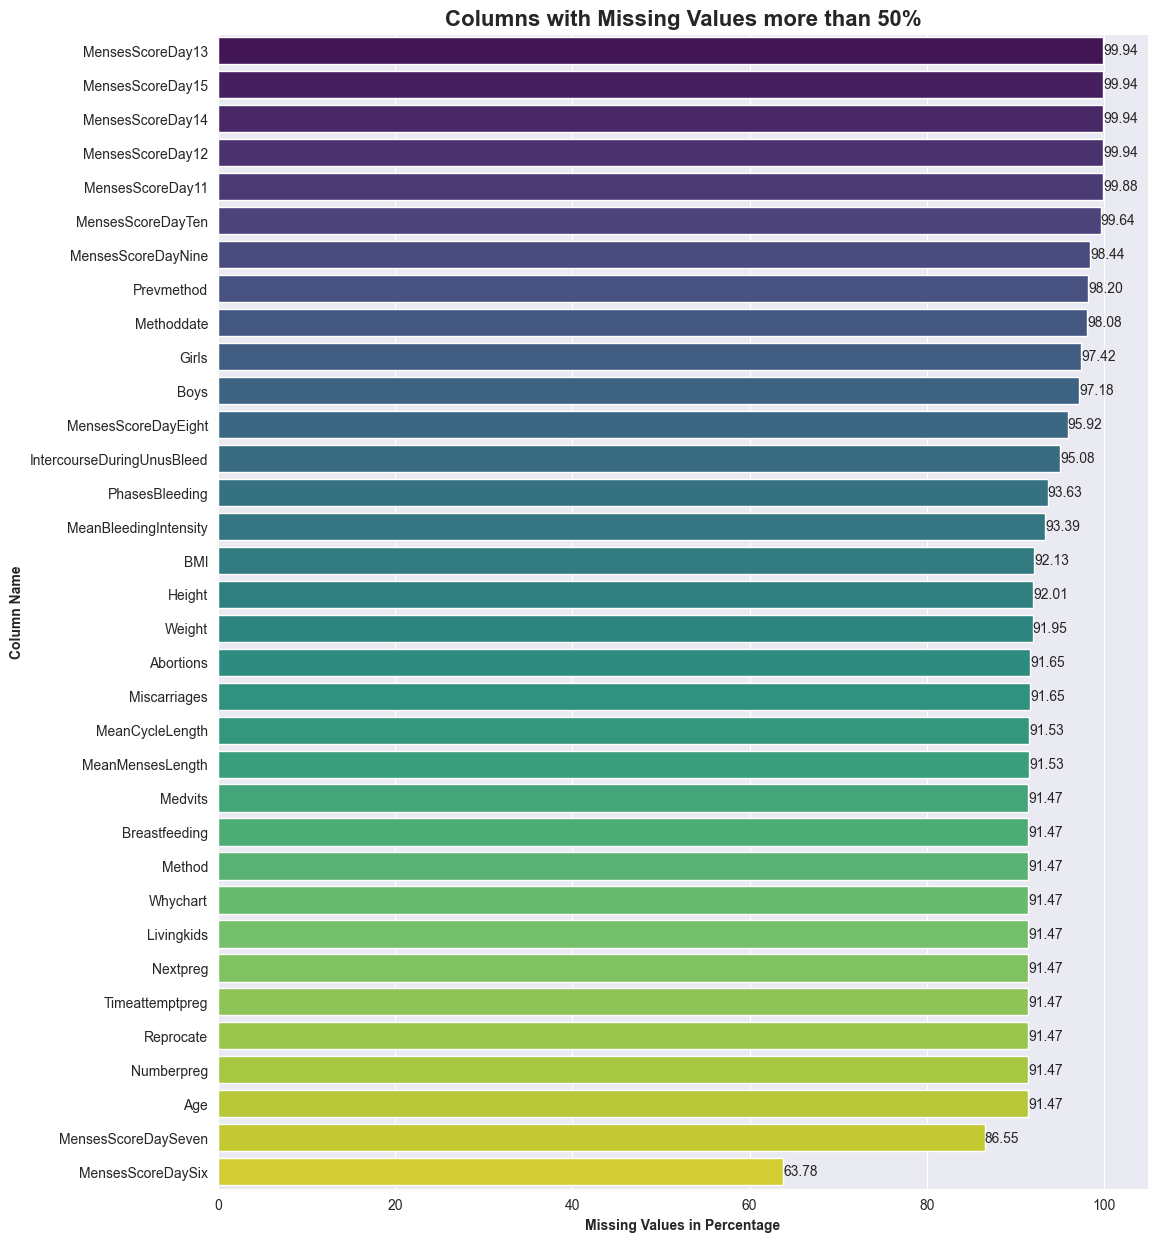

In [33]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})

sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

/var/folders/fh/w81djhzx71b5l66w8dtmbxcc0000gn/T/ipykernel_99956/2914675841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


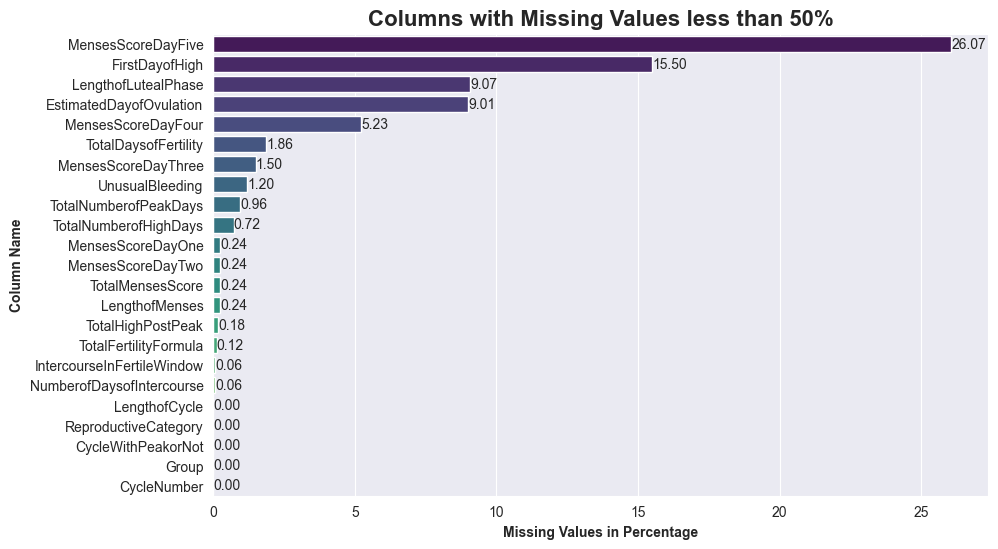

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

In [35]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)

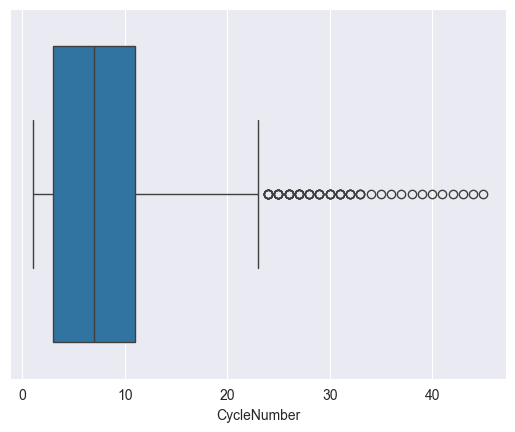

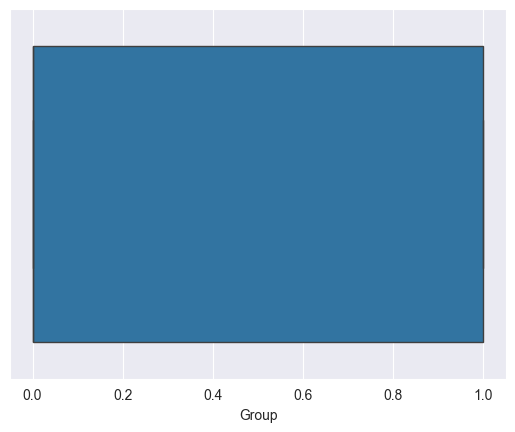

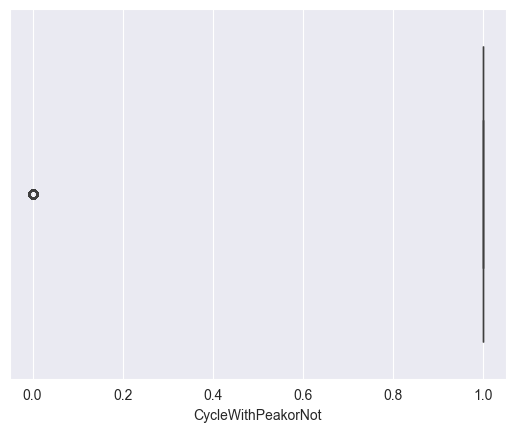

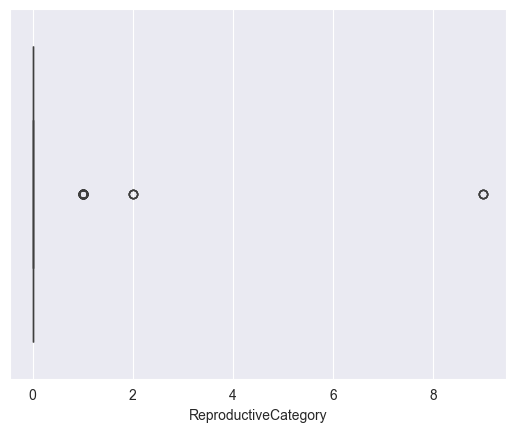

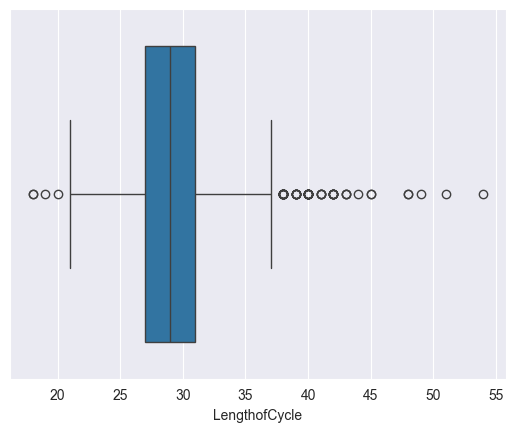

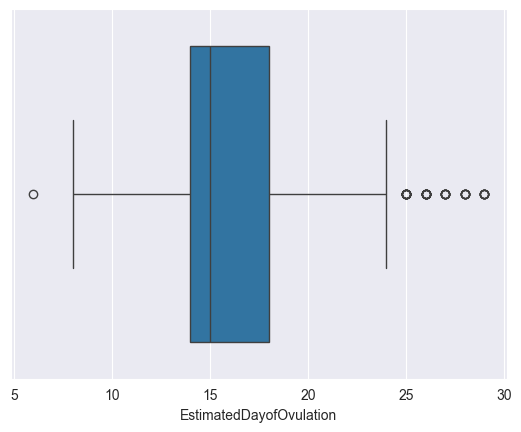

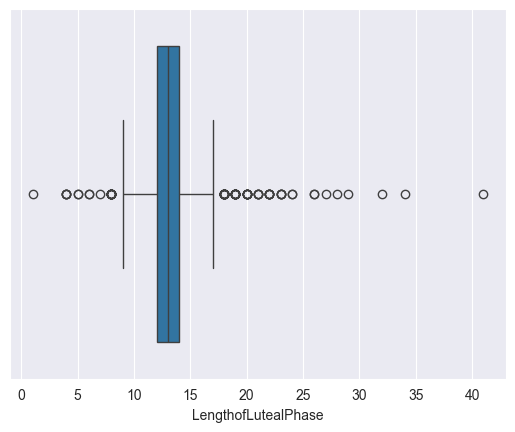

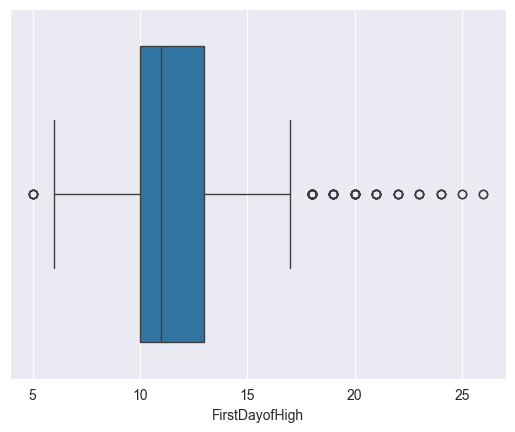

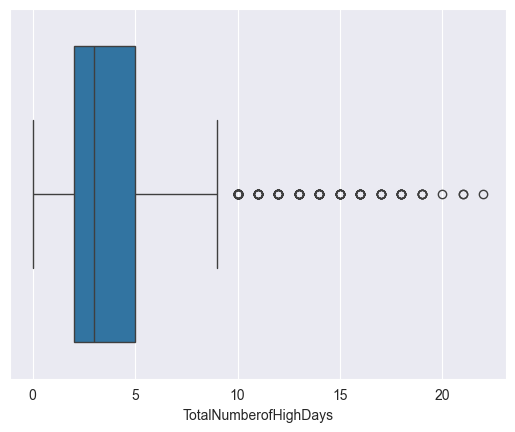

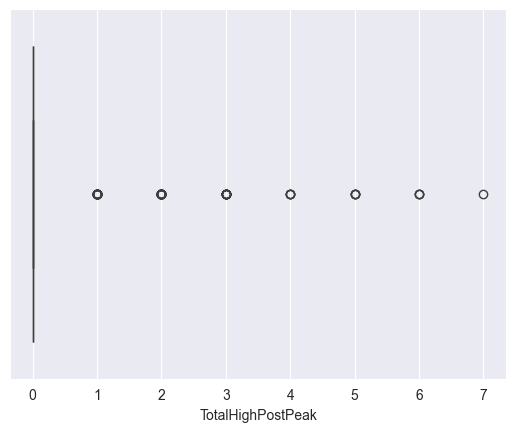

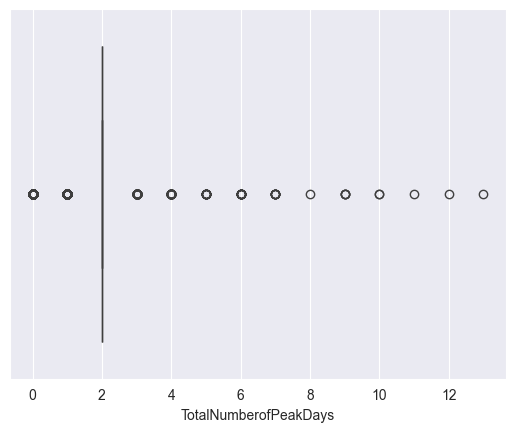

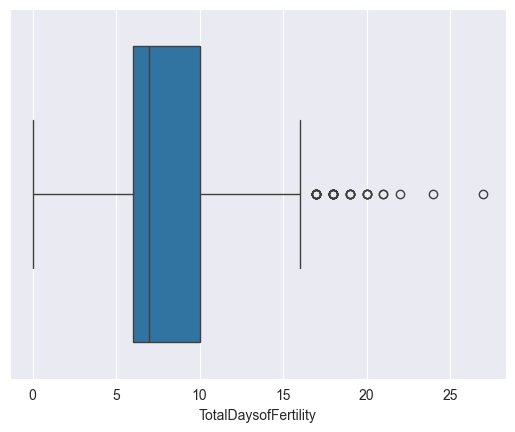

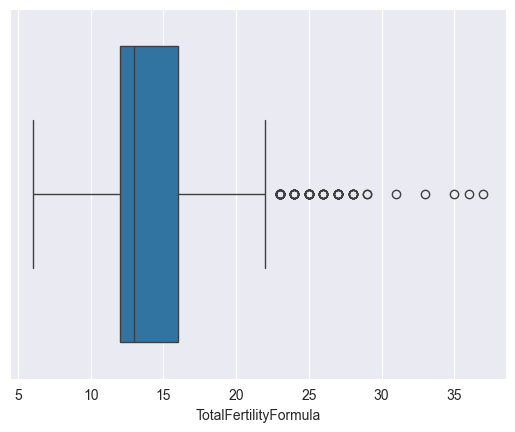

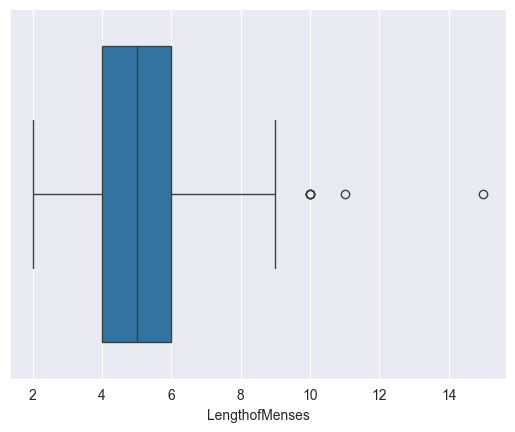

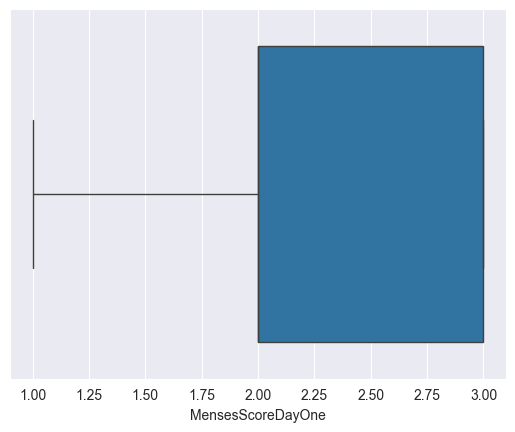

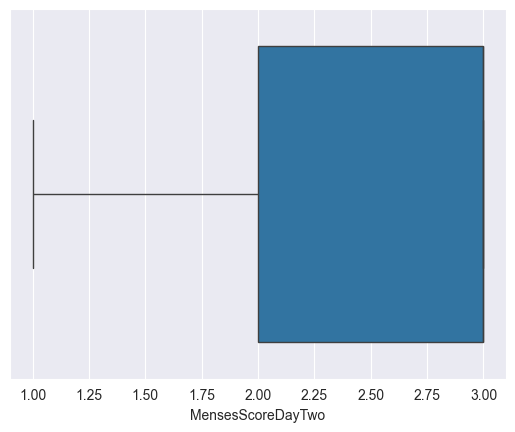

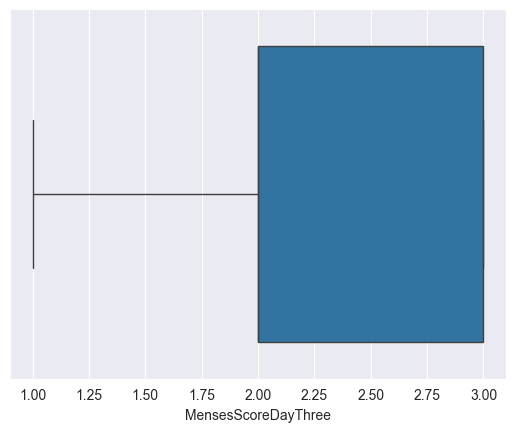

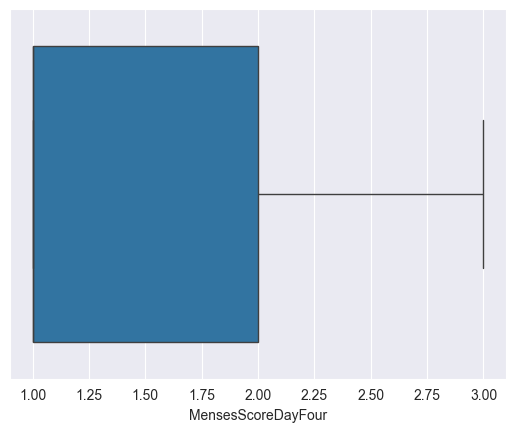

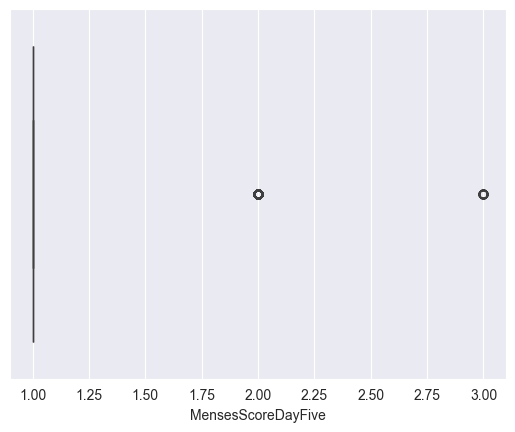

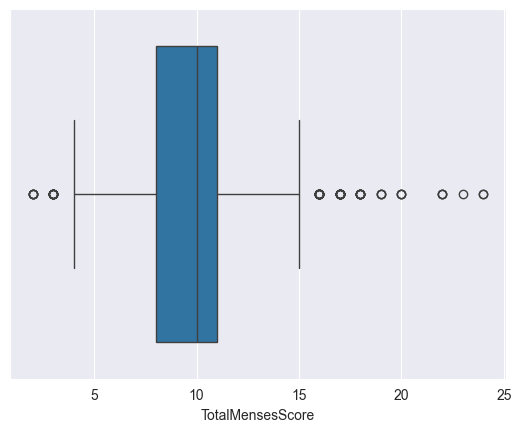

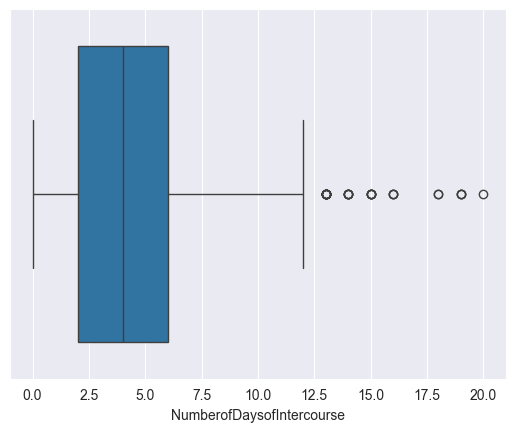

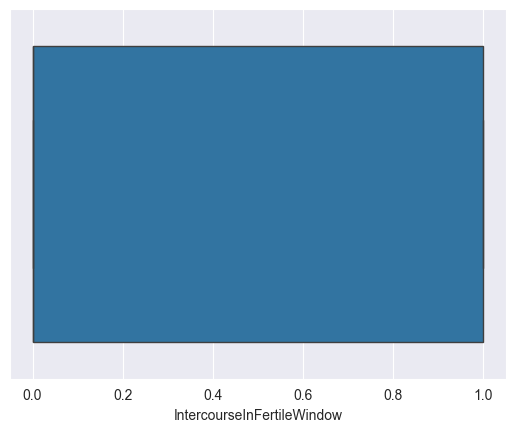

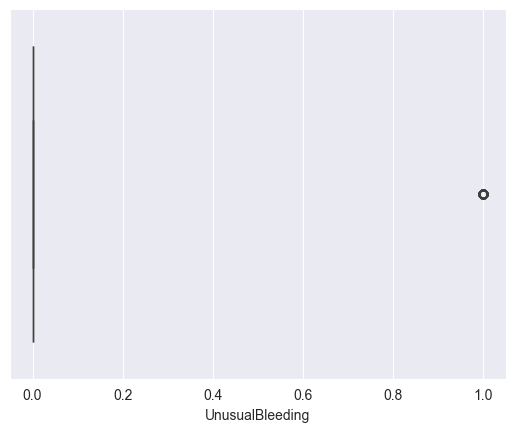

In [36]:
for cols in df.columns:    
    sns.boxplot(data=df[cols] ,orient= "h")
    plt.show()
    

/var/folders/fh/w81djhzx71b5l66w8dtmbxcc0000gn/T/ipykernel_99956/2142087668.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")


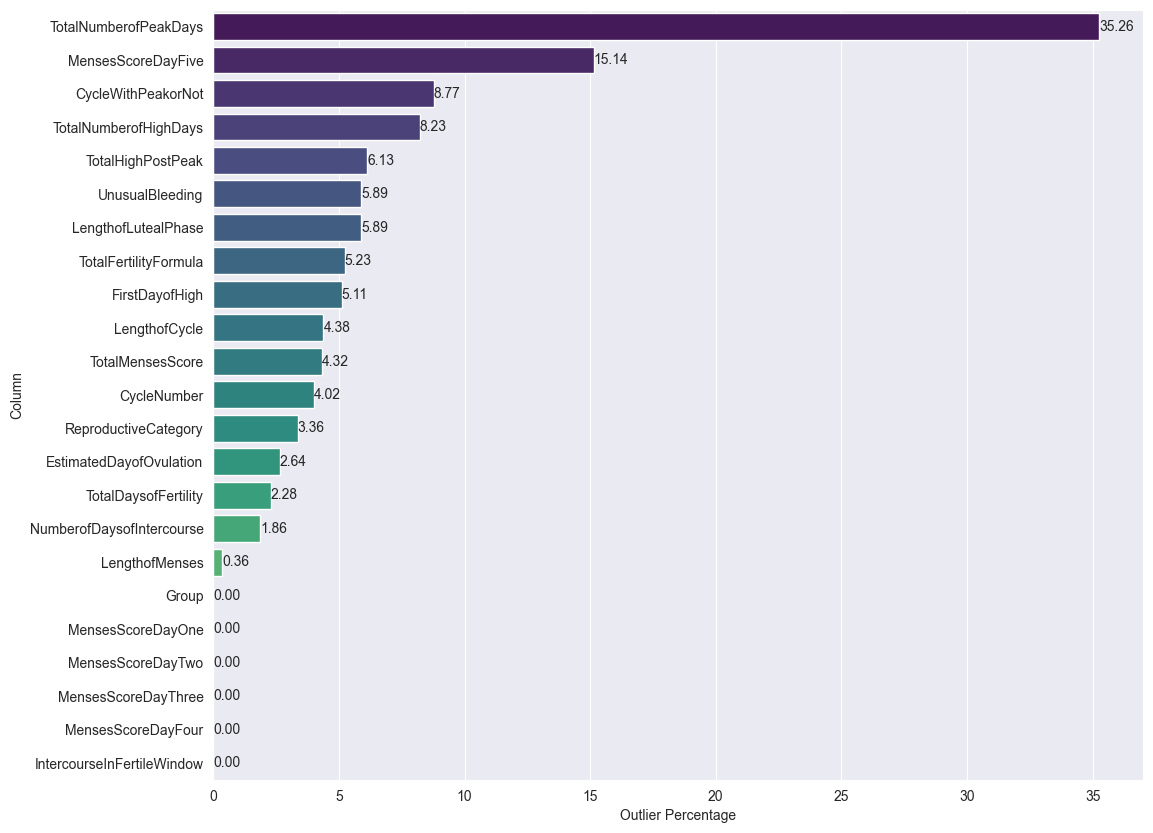

In [37]:
outliers_percentages = []

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers_percentage = (outliers_count / len(df[col])) * 100
    
    outliers_percentages.append({'Column': col, 'Outlier Percentage': outliers_percentage})

outliers_df = pd.DataFrame(outliers_percentages)
outliers_df = outliers_df.sort_values(by='Outlier Percentage', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(data= outliers_df , x="Outlier Percentage", y= "Column" , palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.show()

In [38]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Calculate outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_percentage = outliers.mean() * 100
    
    
    df[col] = df[col].where(~outliers, np.mean(df[col]))

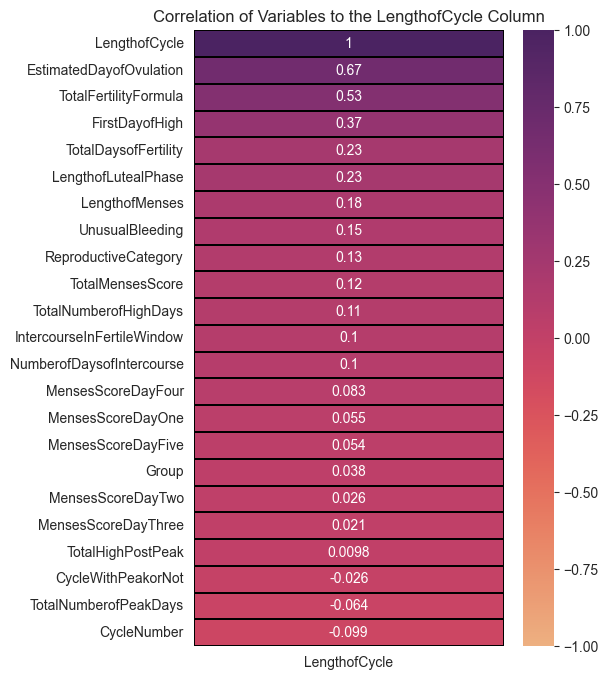

In [39]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['LengthofCycle'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the LengthofCycle Column')
plt.show()

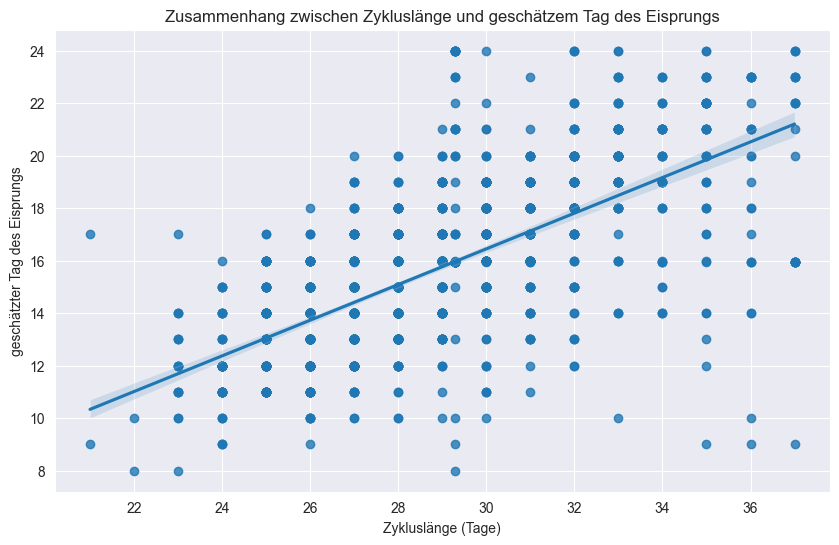

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LengthofCycle', y='EstimatedDayofOvulation', data=df)
plt.title('Zusammenhang zwischen Zykluslänge und geschätzem Tag des Eisprungs')
plt.xlabel('Zykluslänge (Tage)')
plt.ylabel('geschätzter Tag des Eisprungs')
plt.show()

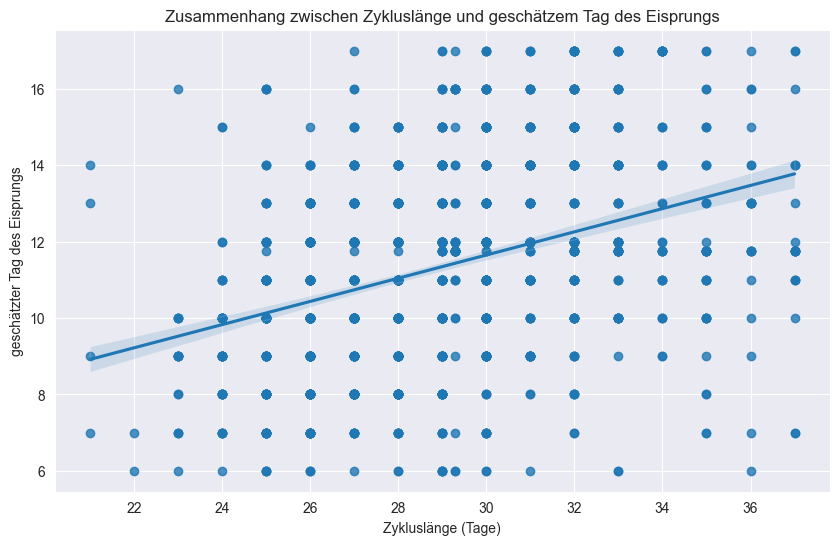

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='LengthofCycle', y='FirstDayofHigh', data=df)
plt.title('Zusammenhang zwischen Zykluslänge und geschätzem Tag des Eisprungs')
plt.xlabel('Zykluslänge (Tage)')
plt.ylabel('geschätzter Tag des Eisprungs')
plt.show()

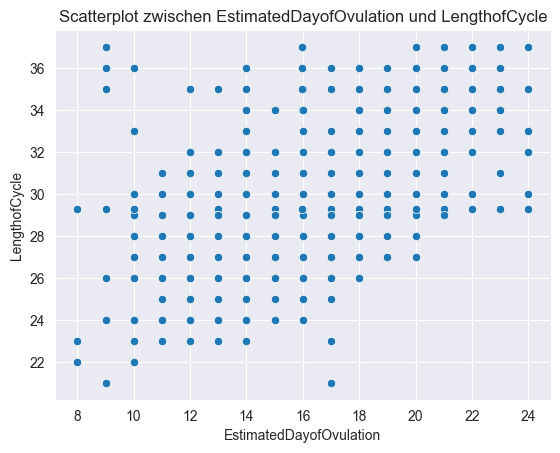

In [42]:
sns.scatterplot(x='EstimatedDayofOvulation', y='LengthofCycle', data=df)
plt.title('Scatterplot zwischen EstimatedDayofOvulation und LengthofCycle')
plt.xlabel('EstimatedDayofOvulation')
plt.ylabel('LengthofCycle')
plt.show()